<h2>FIN5615 Project #2
    <p class="text-primary">Random Walk Simulaton</p>
</h2>

<div class = "alert alert-block alert-danger">
    <b>Due Date</b>: October 12th 2020, 11:59PM EST
</div> 

<div class = "panel panel-success">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Project Introduction</b>
    </div>
    <div class = "panel-body"> 
    In this project we will try to address some of the shortcomings of modeling stock price as a simple random walk. We will compare the simulated option prices from our random walk model against that of the Black-Scholes options pricing formula.
    </div>
</div>
<div class = "panel panel-info">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Instructions</b>
    </div>
    <div class = "panel-body"> 
    Please code you solutions directly in this Notebook under each task in the cells provided below. Include all code used to produce your results, and support your answers with textual explanations if neccessary. You may feel free to add additional Code and/or Markdown cells as needed. Code must be written using <b>Python 3</b>.
    <br><br>Please order the cells in your Notebook in the order in which they are intended to run! It is expected that your Notebook is able to run in sequence from start to finish without any errors (before submitting check by: <code>Kernel > Restart & Run All</code>).
    <br><br>Once ready, please submit your assignment as an <b>.ipynb file</b> (<code>File > Download as > Notebook</code>). You must name your files in the following format: <b><code>FIN5615_Assignmnet_1_Richard_Lee_tuc12345.ipynb</code></b>.
    </div>
</div>

---
<div class = "alert alert-block alert-warning">
    <b>Note</b>: Import all libraries that you plan on using in the code block below.
</div>

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 1</b>
    </div>
    <div class = "panel-body"> 
    Continue with the example of Ford (F) stock price from the end of Lecture 3. Assume that daily price movements of F follow a simple random walk, and that the price of F today is \$5.
    <ul>
        <li>Simulate the price of F over the next year (250 trading days) for 1000 trials.</li>
        <li>Plot the histogram of the probability distribution of F's stock price at the end of the year.</li>
    </ul>
    <br>Set the random seed to 5615 at the beginning of your code.
    <p style="text-align:right;">[5pts]</p>
    </div>
</div>

In [2]:
random.seed(5615)

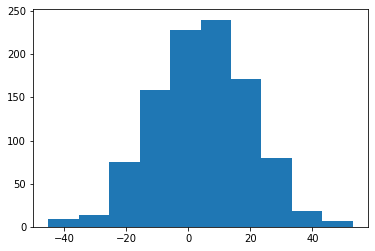

In [3]:
#establishing variables
starting_price = 5
steps = 250
trials = 1000

#simulation
sims = []
for trial in range(trials):
    random_path = [starting_price]
    for step in range(steps):
        if random.random() < .5:
            price_change = 1
        else:
            price_change = -1

        random_path.append(random_path[-1] + price_change)
    sims.append(random_path)
    

ending_prices = [trial[-1] for trial in sims]
#histogram plotting
plt.hist(ending_prices)
plt.show()

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 2</b>
    </div>
    <div class = "panel-body"> 
    One problem that arises when naively modeling stock price as a random walk is that simulated prices are not guarenteed to be positive. In the case of a simple random walk, we are assuming stock prices change by an arbitrary +\$1 or -\$1 at each time step.
    <br><br>Instead of assuming a price movement of +\$1 or -\$1, modify the random walk's possible price movement to be either +1% or -1% (equivalently, a mutiplicative factor of 1.01 or 0.99):
    <br><br>
    $$X_{t+1} = \left\{
        \begin{array}{ll}
            X_t \times 1.01 & \quad p = 0.5 \\
            X_t \times 0.99 & \quad p = 0.5
        \end{array}
    \right.$$
    <ul>
        <li>Simulate the price of F under this new dynamic over the next year (250 trading days) for 1000 trials.</li>
        <li>Plot a histogram of the probability distribution of F's stock price at the end of the year.</li>
        <li>Explain why making this adjustment prevents the stock price from becoming negative.</li>
    </ul>
    <br>Set the random seed to 5615 at the beginning of your code.
    <p style="text-align:right;">[10pts]</p>
    </div>
</div>

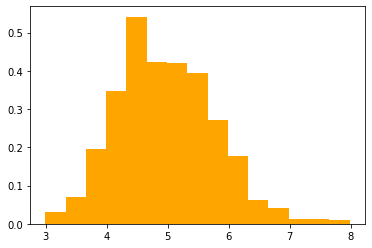

In [4]:
random.seed(5615)

starting_price = 5
steps = 250
trials = 1000

sims = []
for trial in range(trials):
    random_path = [starting_price]
    for step in range(steps):
        if random.random() < .5:
            price_change = 1.01
        else:
            price_change = .99

        random_path.append(random_path[-1] * price_change)
    sims.append(random_path)
len(sims)

ending_prices = [trial[-1] for trial in sims]
len(ending_prices)

#plotting
plt.hist(ending_prices , density = True, bins= 15,color='orange')
plt.show()

Becasue we use .99 as the down factor we can never hit 0 it will get infinetly small but never zero becasue we just take a smaller and smaller peice of the starting value.




<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 3</b>
    </div>
    <div class = "panel-body"> 
    Another issue with our current random walk model is that the magnitude of the stock price's movement is the same regardless of the frequency of our simulation.
    <br><br>For example, if we simulate quarterly increments, then the stock price can exhibit only 4 up or down movements of 1% within one year, whereas if we simulate in daily increments the stock price can have 250 up or down movements of 1% within one year, resulting in a much wider distribution of ending prices. This type of behavior is unreasonable.
    <br><br>We can try to remedy this by adjusting the magnitude of the stock price movement by the "step size" (h) of our simulation:
    <br><br>
    $$X_{t+1} = \left\{
        \begin{array}{ll}
            X_t \times (1 + 0.01\sqrt{h}) & \quad p = 0.5 \\
            X_t \times (1 - 0.01\sqrt{h}) & \quad p = 0.5
        \end{array}
    \right.$$
    <br>Under this new model specification, we can interpret 1% as the percentage movement in stock price over an annual period, and multiplying it by $\sqrt{h}$ scales it for the length of time for a single period of our simulated random walk, where $h = \frac{1}{steps}$. For example, under daily increments, $h = \frac{1}{250}$.
    <ul>
        <li>Simulate the price of F under this new dynamic over the next year (250 trading days) for 1000 trials.</li>
        <li>Plot a histogram of the probability distribution of F's stock price at the end of the year.</li>
    </ul>
    Set the random seed to 5615 at the beginning of your code.
    <p style="text-align:right;">[10pts]</p>
    </div>
</div>

In [5]:
random.seed(5615)

starting_value = 5
steps = 250
trials = 1000

sims = []
for trial in range(trials):
    random_path = [starting_value]
    for step in range(steps):
        if random.random() < .5:
            price_change = (1 + (.01 * np.sqrt(1 / steps)))
        else:
            price_change = (1 - (.01 * np.sqrt(1 / steps)))

        random_path.append(random_path[-1] * price_change)
    sims.append(random_path)
len(sims)

ending_prices = [trial[-1] for trial in sims]


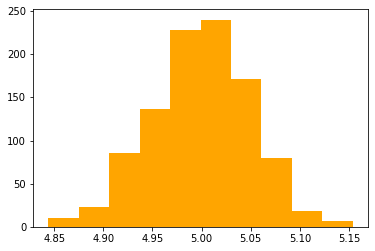

In [6]:
plt.hist(ending_prices, color = "orange")
plt.show()

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 4</b>
    </div>
    <div class = "panel-body"> 
    Another issue with our current random walk model is that our assumed annual magnitude of the stock price's movement is the same 1% regardless of the risk profile of the company. For example, an annual movement of 1% might seem reasonable for F, but definitely not for TSLA stock.
    <br><br>We can try to account for this by including the stock's annual volaility as another input parameter to our random walk simulation. Recall that the volatility is a measure of the disperson (a.k.a. standard deviation) on a stock's *continuously compounded returns*.
    <br><br>So, we can replace our arbitrary value of 1% with a change in the stock's return in that time step in terms of its annual volatility ($\sigma$), applied as continuously compounded factors, $u$ and $d$:
    <br><br>
    $$X_{t+1} = \left\{
        \begin{array}{ll}
            X_t \times u = X_te^{\sigma\sqrt{h}} & \quad p = 0.5 \\
            X_t \times d = X_te^{-\sigma\sqrt{h}} & \quad p = 0.5
        \end{array}
    \right.$$
    <br>Assume that the annual volatility of F's returns is 10%:
    <ul>
        <li>Simulate the price of F under this new dynamic over the next year (250 trading days) for 1000 trials.</li>
        <li>Calculate F's simulated annual rate of return for each of the 1000 trials. Plot this distribution of annual returns in a histogram.</li>
        <li>Calculate F's average simulated annual rate of return.</li> 
    </ul>
    Set the random seed to 5615 at the beginning of your code.
    <p style="text-align:right;">[10pts]</p>
    </div>
</div>

In [7]:
random.seed(5615)

starting_value = 5
step = 250
steps = 1/step
trials = 1000
volatility = .1

sims = []
for trial in range(trials):
    random_path = [starting_value]
    for change in range(step):
        if random.random() < .5:
            price_change = (np.exp(volatility * np.sqrt(steps)))
        else:
            price_change = (np.exp(-volatility * np.sqrt(steps)))

        random_path.append(random_path[-1] * price_change)
    sims.append(random_path)

end_price = [trial[-1] for trial in sims]


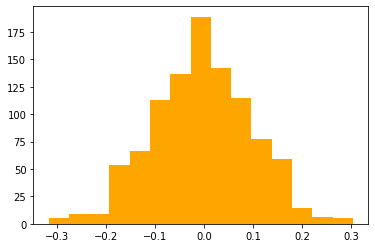

-0.32 %


In [8]:
annual_rate = []
for k in end_price:
    total = np.log(k/starting_value)
    annual_rate.append(total)

plt.hist(annual_rate, color = "orange", bins = 15)
plt.show()

print(round(np.mean(annual_rate),4)*100,"%")

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 5</b>
    </div>
    <div class = "panel-body"> 
    It is not very realistic to model 0% rates of return on stock prices. It is generally the investor's belief that stock prices will increase over time, although at what rate is unclear. For now, let's assume that the expected return on the stock is equal to the risk-free rate.
    <br><br>We can achieve this by adjusting the probabilities associated with an up or down movement in the stock price from 50% to a varying value of $p$, such that on average we receive the risk free rate of return (I will skip over the math here, but this is the idea of risk-neutral pricing):
    <br><br>
    $$X_{t+1} = \left\{
        \begin{array}{ll}
            X_t \times u = X_te^{\sigma\sqrt{h}} & \quad p = \frac{e^{rh} - d}{u - d} \\
            X_t \times d = X_te^{-\sigma\sqrt{h}} & \quad 1 - p
        \end{array}
    \right.$$ 
    <br>Notice that the value of $p$ will now vary at each step of the random walk, and depends on the values of $u$ and $d$, which are just the multiplicative factors on the stock price that we defined previously.
    <br><br>Assume that the annual volatility of F's returns is 10% and a risk-free rate of 1%:
    <ul>
        <li>Simulate the price of F under this new dynamic over the next year (250 trading days) for 1000 trials.</li>
        <li>Plot a sample of 100 paths from the simulation on a single line plot.</li>
        <li>Calculate the average path for F's stock price over the 1000 trials. Plot this as a line plot.</li>
        <li>Calculate F's average simulated annual rate of return. Is it close to our assumed risk-free rate?</li>
    </ul>
    <br>Set the random seed to 5615 at the beginning of your code.
    <p style="text-align:right;">[15pts]</p>
    </div>
</div>

In [19]:
#random.seed(5615)

starting_price = 5
steps = 250
trials = 1000
volatility = .1
risk_free = .01
u = np.exp(volatility*np.sqrt(1/steps))
d = np.exp(-volatility*np.sqrt(1/steps))
p = (np.exp(risk_free*(1/steps))-d)/(u-d)

sims = []
for trial in range(trials):
    random_path = [starting_price]
    for step in range(steps):
        if random.random() < p:
            price_change = (np.exp(volatility * np.sqrt(1/steps)))
        else:
            price_change = (np.exp(-volatility * np.sqrt(1/steps)))

        random_path.append(random_path[-1] * price_change)
    sims.append(random_path)

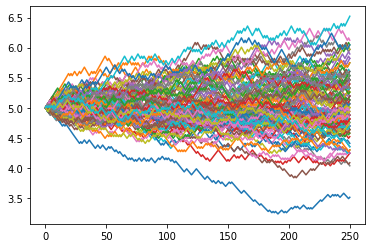

In [10]:
for i in range(100):
    plt.plot(sims[i])
plt.show()

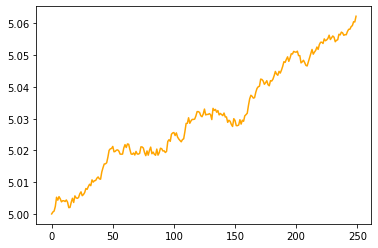

In [11]:
steps = 250
average_path = []
for step in range(steps):
    average_price = np.mean([trial[step] for trial in sims])
    average_path.append(average_price)
plt.plot(average_path,color = "orange")
plt.show()

In [12]:
annual_rate = []
for k in end_price:
    total = np.log(k/starting_value)
    annual_rate.append(total)
np.mean(annual_rate)
print(round(np.mean(annual_rate)*100,4),"%")

-0.3238 %


<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 6</b>
    </div>
    <div class = "panel-body"> 
    The model we have now is the <b>Cox-Ross-Rubinstein Binomial Tree</b>, and is a much better approximation of stock price movements compared to a simple random walk. We can even price options contracts using this model.
    <br><br>Continue to assume that F is worth \$5 today, with an annual volatility of 10%, and risk-free rate at 1%. 
    <ul>
        <li>Using the simulation results from the previous task, for each of the 1000 trials, calculate the terminal payoff of a call option with strike of $5.50 that expires 1 year from today.</li>
        <li>What is the simulated average payoff of this call option?</li>
        <li>What is the present value of the simulated average payoff of this call option? This is the Binomial Tree's simulated option price.</li>
        <li>Compare this value against the price under the Black-Scholes options pricing formula (you do not have to do this in python). How close are the two prices?</li>
    </ul>
    <p style="text-align:right;">[10pts]</p>
    </div>
</div>

In [13]:
random.seed(5615)

starting_price = 5
steps = 250
trials = 1000
volatility = .1
risk_free = .01
strike = 5.5
u = np.exp(volatility*np.sqrt(1/steps))
d = np.exp(-volatility*np.sqrt(1/steps))
p = (np.exp(risk_free*(1/steps))-d)/(u-d)

sims = []
for trial in range(trials):
    random_path = [starting_price]
    for step in range(steps):
        if random.random() < p:
            price_change = (np.exp(volatility * np.sqrt(1/steps)))
        else:
            price_change = (np.exp(-volatility * np.sqrt(1/steps)))

        random_path.append(max(random_path[-1] * price_change - strike,0.))
    sims.append(random_path)

In [14]:
average_payoff = round(np.mean(sims),4)
print("The average call payoff with strike",strike,'is $',average_payoff,)

The average call payoff with strike 5.5 is $ 0.0199


In [15]:
PV = average_payoff * np.exp(-risk_free)
print(round(PV,4))


0.0197


In python we get .0197 with Derivagem we get .057 which would be 6 cents. Im not sure why we are of i think it might be the time difrence or the simulation is closer to the real value.Derivagem uses calnder days not trading days so that may play a part.

*Your written response here*




<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 7</b>
    </div>
    <div class = "panel-body"> 
    We can further improve our simulated option price to match the Black-Scholes options price, by (1) using more steps in our binomial tree, i.e. smaller step sizes, and (2) increasing the number of trials.
    <br><br>Reprice the call option on F using 1000 steps and 5000 trials (this will take more computation time). How does the simulated price compare to the Black-Scholes options price?
    <br><br>Set the random seed to 5615 at the beginning of your code.
    <p style="text-align:right;">[15pts]</p>
    </div>
</div>

In [16]:
random.seed(5615)

starting_price = 5
steps = 1000
trials = 5000
volatility = .1
risk_free = .01
strike = 5.5
u = np.exp(volatility*np.sqrt(1/steps))
d = np.exp(-volatility*np.sqrt(1/steps))
p = (np.exp(risk_free*(1/steps))-d)/(u-d)

sims = []
for trial in range(trials):
    random_path = [starting_price]
    for step in range(steps):
        if random.random() < p:
            price_change = (np.exp(volatility * np.sqrt(1/steps)))
        else:
            price_change = (np.exp(-volatility * np.sqrt(1/steps)))

        random_path.append(max(random_path[-1] * price_change - strike,0.))
    sims.append(random_path)

    
average_payoff = round(np.mean(sims),4)
print("The new large trial average call payoff with strike $",strike,'is $',average_payoff,)

PV = average_payoff * np.exp(-risk_free)
print(round(PV,4))

The new large trial average call payoff with strike $ 5.5 is $ 0.005
0.005


<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 8</b>
    </div>
    <div class = "panel-body"> 
    Tesla (TSLA) stock price is currently \$1400, with an annual volatility of 70%. Assume a risk-free rate of 1%. Assume a 6-month put option with a strike of \$1200.
    <ul>
        <li>Determine the price of this put option by simulating a CRR binomial tree with 5000 trials and using 1000 steps. Compare the simulated option price against the Black-Scholes options price.</li>
        <li>Plot the average simulated TSLA stock price over the 5000 trials. How does TSLA's simulated average path compare against F?</li>
        <li>If simulations from the CRR Binomial Tree can give option prices similar to the Black-Scholes model, then why do we still use the latter? Under what situations might we prefer simulations over the Black-Scholes model?</li>
    </ul>
    Set the random seed to 5615 at the beginning of your code.
    <p style="text-align:right;">[25pts]</p>
    </div>
</div>

In [17]:
random.seed(5615)

t = .5
steps = 100
trials = 500
starting_price = 1400
volatility = .7
risk_free = .01
strike = 1200

u = np.exp(volatility*np.sqrt(1/steps))
d = np.exp(-volatility*np.sqrt(1/steps))
p = (np.exp(risk_free*(1/steps*t))-d)/(u-d)

sims = []
for trial in range(trials):
    random_path = [starting_price]
    for step in range(steps):
        if random.random() < p:
            price_change = (np.exp(volatility * np.sqrt(1/steps)))
        else:
            price_change = (np.exp(-volatility * np.sqrt(1/steps)))

        random_path.append((random_path[-1] * price_change))
    sims.append(random_path)

    
average_payoff = round(np.mean(sims),4)
print("The Tesla average put payoff with strike $",strike,'is $',average_payoff,)

PV = average_payoff * np.exp(-risk_free*t)
print("The PV of a Tesla put is ",round(PV,4))


The Tesla average put payoff with strike $ 1200 is $ 1424.7149
The PV of a Tesla put is  1417.6091


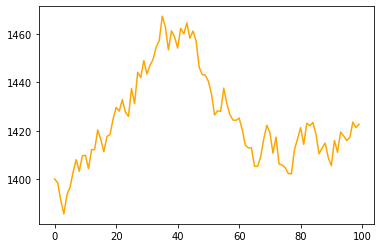

In [18]:
steps = 100
average_path = []
for step in range(steps):
    average_price = np.mean([trial[step] for trial in sims])
    average_path.append(average_price)
plt.plot(average_path,color = "orange")
plt.show()



*Your written response here*




In [21]:
import numpy as np

def generate_weiner_diffs(n, delta):
    return [np.random.normal(loc=0.0, scale=np.sqrt(delta)) for _ in range(n)]

def single_iter(rt, a, b, delta, sigma, weiner_diff):
    return rt + a*(b-rt)*delta + sigma*np.sqrt(rt)*weiner_diff

def run_sim(n, a, b, r0, sigma, delta):
    output = [ r0 ]
    weiner_diffs = generate_weiner_diffs(n, delta)
    for i in range(n):
        output.append(single_iter(output[i], a, b, delta, sigma, weiner_diffs[i]))
    return output

In [33]:
a= 0.150171427
b= 0.013625329
sigma = 0.00288994
r0 = .0266
delta = 0.01
N = 800

test_run_1 = run_sim(N, a, b, r0, sigma, delta)
test_run_2 = run_sim(N, a, b, r0, sigma, delta)


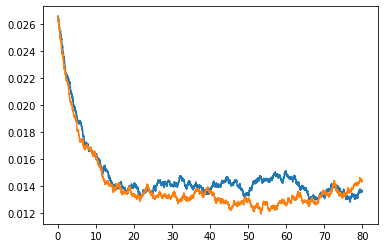

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

total_time = delta*N
time_axis = np.linspace(0, total_time, N+1) # N+1 to account for r0
plt.plot(time_axis.tolist(), test_run_1)
plt.plot(time_axis.tolist(), test_run_2)